In [61]:
# import the Spacy library and also the English language model.

import spacy

nlp = spacy.load("en_core_web_sm")

In [142]:
import os

# Specify the directory
folder_path = "../data/raw_corpus/" 

# List to store the article texts
all_text = []

# Loop over the files and directories in the given directory
for root, dirs, files in os.walk(folder_path):
    for filename in files:
        if filename.endswith(".txt"):  # Ensure we're only reading .txt files
            file_path = os.path.join(root, filename)
            try:
                with open(file_path, 'r', encoding='utf-8') as file:
                    all_text.append(file.read())  # Append each file's content to the all_text list
                    
            except UnicodeDecodeError:
                try:
                    with open(file_path, 'r', encoding='latin-1') as file:
                        all_text.append(file.read())
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")

#print(all_text[0])

# Convert the list to a string, with each word separated by a space
all_text = " ".join(all_text)
print(all_text[:1000])
print(type(all_text))
# Write the whole corpus to a new file
with open("../data/all_text.txt", mode="w", encoding="utf-8") as file:
    file.write(all_text)

print("Combined text has been written to 'all_text.txt'")

UK will not be able to resist China's tech dominance
China's success in technology has not come out of thin air, even given the unlikely origins of the DeepSeek deep shock.
The obscure Hangzhou hedge fund that coded a ChatGPT competitor as a side project it claims cost just $5.6m to train emerges from a concerted effort to invest in future generations of technology.
This is not an accident. This is policy.
The raw materials of artificial intelligence (AI) are microchips, science PhDs and data. On the latter two, China might be ahead already.
There are on average more than 6,000 PhDs in STEM subjects (science, technology, engineering and mathematics) coming out of Chinese universities every month. In the US it is more like 2,000-3,000, in the UK it is 1,500.
In terms of patents generally, more are being filed in China than in the rest of the world put together. In 2023China filed 1.7 million patents, against 600,000 in the US. Two decades earlier China had a third of the patents filed b

In [144]:
all_text = all_text.replace("\n", " ")  # remove all endlines \n

In [146]:
# Convert the entire text to lowercase after reading all files
all_text = all_text.lower()

In [148]:
# Let's see how long our string is and how it looks like (thousand first
# characters).

print(f"Our string 'all_text' contains {len(all_text)} characters.")

print(all_text[0:1000])

Our string 'all_text' contains 270074 characters.
uk will not be able to resist china's tech dominance china's success in technology has not come out of thin air, even given the unlikely origins of the deepseek deep shock. the obscure hangzhou hedge fund that coded a chatgpt competitor as a side project it claims cost just $5.6m to train emerges from a concerted effort to invest in future generations of technology. this is not an accident. this is policy. the raw materials of artificial intelligence (ai) are microchips, science phds and data. on the latter two, china might be ahead already. there are on average more than 6,000 phds in stem subjects (science, technology, engineering and mathematics) coming out of chinese universities every month. in the us it is more like 2,000-3,000, in the uk it is 1,500. in terms of patents generally, more are being filed in china than in the rest of the world put together. in 2023china filed 1.7 million patents, against 600,000 in the us. two decade

In [150]:
print(repr(all_text[:500]))  # Print first 500 characters, showing special characters


"uk will not be able to resist china's tech dominance china's success in technology has not come out of thin air, even given the unlikely origins of the deepseek deep shock. the obscure hangzhou hedge fund that coded a chatgpt competitor as a side project it claims cost just $5.6m to train emerges from a concerted effort to invest in future generations of technology. this is not an accident. this is policy. the raw materials of artificial intelligence (ai) are microchips, science phds and data. o"


In [152]:
# Next, we process next to spacy by calling the nlp()
# function, to be able to tokenize it and to filter our tokens of specific kind.

doc = nlp(all_text)

print(type(doc))

<class 'spacy.tokens.doc.Doc'>


In [153]:
for token in doc[0:10]:
    print(token.text)

uk
will
not
be
able
to
resist
china
's
tech


In [200]:
import spacy

# Load spaCy model (if not already loaded)
nlp = spacy.load("en_core_web_sm")

# Define custom words to exclude
custom_exclude = {"china", "deepseek", "chinese", "ai", "model", "language","company","say"}

# Process your document (assuming 'doc' is already defined)
# If not, you would do: doc = nlp(your_text)

# Modified lists
list_nonstop = []
list_others = []
list_custom_excluded = []  # New list to track custom excluded words

# Enhanced filtering
for token in doc:
    # Convert to lowercase for case-insensitive comparison
    token_lower = token.text.lower()
    
    if token.is_stop == False and token.is_alpha == True:
        if token_lower in custom_exclude or token.lemma_.lower() in custom_exclude:
            # This is a custom excluded word
            list_custom_excluded.append(token)
        else:
            # This is a non-stop alphabetic word we want to keep
            list_nonstop.append(token)
    else:
        # This is either a stop word or contains non-alphabetic characters
        list_others.append(token)

print(f"Some examples of 'nonstop' tokens: {[token.text for token in list_nonstop[0:15]]}")
print(f"Some examples of custom excluded words: {[token.text for token in list_custom_excluded[0:15]]}")

# Count statistics
print(f"\nStatistics:")
print(f"- Non-stop alphabetic words (kept): {len(list_nonstop)}")
print(f"- Custom excluded words: {len(list_custom_excluded)}")
print(f"- Stop words or non-alphabetic: {len(list_others)}")
print(f"- Total tokens: {len(doc)}")

Some examples of 'nonstop' tokens: ['UK', 'able', 'resist', 'tech', 'dominance', 'success', 'technology', 'come', 'thin', 'air', 'given', 'unlikely', 'origins', 'deep', 'shock']
Some examples of custom excluded words: ['China', 'China', 'DeepSeek', 'AI', 'China', 'Chinese', 'China', 'China', 'China', 'Chinese', 'DeepSeek', 'AI', 'China', 'China', 'Chinese']

Statistics:
- Non-stop alphabetic words (kept): 20577
- Custom excluded words: 2451
- Stop words or non-alphabetic: 29451
- Total tokens: 52479


In [202]:
#As a final step, let's save the lemma form of our tokens.
# As noted above, spaCy has stored the base forms in the tokens attribute .lemma_,
# which is a string.

result_lemmas = []

for token in list_nonstop:
    result_lemmas.append(token.lemma_)

In [204]:
# Let's see how the lemmatization looks like for the first twenty words:

for i in range(0, 20):
    print(f"({i} lemmatized: {list_nonstop[i].text} ---> {result_lemmas[i]}")

# Looks very good!

# PS. .text attribute returns the text form of the token, which is a string!
# token.lemma_ is a string! the tokens themselves are Spacy doc objects, and
# cannot be operated like string variables.

(0 lemmatized: UK ---> UK
(1 lemmatized: able ---> able
(2 lemmatized: resist ---> resist
(3 lemmatized: tech ---> tech
(4 lemmatized: dominance ---> dominance
(5 lemmatized: success ---> success
(6 lemmatized: technology ---> technology
(7 lemmatized: come ---> come
(8 lemmatized: thin ---> thin
(9 lemmatized: air ---> air
(10 lemmatized: given ---> give
(11 lemmatized: unlikely ---> unlikely
(12 lemmatized: origins ---> origin
(13 lemmatized: deep ---> deep
(14 lemmatized: shock ---> shock
(15 lemmatized: obscure ---> obscure
(16 lemmatized: Hangzhou ---> Hangzhou
(17 lemmatized: hedge ---> hedge
(18 lemmatized: fund ---> fund
(19 lemmatized: coded ---> code


In [206]:
print(result_lemmas[:20])  # Show first 20 items


['UK', 'able', 'resist', 'tech', 'dominance', 'success', 'technology', 'come', 'thin', 'air', 'give', 'unlikely', 'origin', 'deep', 'shock', 'obscure', 'Hangzhou', 'hedge', 'fund', 'code']


In [208]:
from collections import Counter

word_counts = Counter(result_lemmas)

# Get the top 30 most common words
top_30_words = word_counts.most_common(30)

# Print the top 30 most common words
print(top_30_words)


[('tech', 211), ('chip', 150), ('like', 146), ('technology', 135), ('build', 121), ('OpenAI', 106), ('year', 99), ('new', 96), ('world', 94), ('question', 93), ('government', 93), ('app', 91), ('cost', 87), ('chatbot', 78), ('power', 76), ('people', 76), ('market', 76), ('industry', 75), ('lead', 74), ('system', 74), ('datum', 71), ('use', 70), ('start', 69), ('american', 68), ('intelligence', 67), ('way', 67), ('firm', 64), ('billion', 64), ('open', 64), ('train', 62)]


In [210]:
# We are satisfied with the result and write our processed data to a text file.
# Writing to a text file is done similarly to reading from a file, but we use the mode "w".
folder_path = "../data/"  

with open(folder_path + "deepseek_output_lemmas.txt", mode="w", encoding="utf-8") as file:
    for lemma in result_lemmas:
        file.write(lemma + "\n")  # Write each lemma followed by a new line

print("Pro-processed corpus has been written to 'deepseek_output_lemmas.txt'")


Pro-processed corpus has been written to 'deepseek_output_lemmas.txt'


In [212]:
with open("../data/deepseek_output_lemmas.txt", mode="r", encoding="utf-8") as f :
     text = f.read()
print(text[:50])

UK
able
resist
tech
dominance
success
technology
c


In [214]:
# We create a word cloud of our key terms. We could as well create a bar graph
# or create a table with frequencies.
# The image is saved to our folder, where we can have a more detailed look at it.

# For the visualization, we need to install the package wordcloud

!pip install wordcloud

words = " ".join(lemmas) # We join our list to a string to visualize it with WordCloud
words = words.replace("deepseek", "") # We remove the main keyword from our visualization.

from wordcloud import WordCloud
import matplotlib.pyplot as plt



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


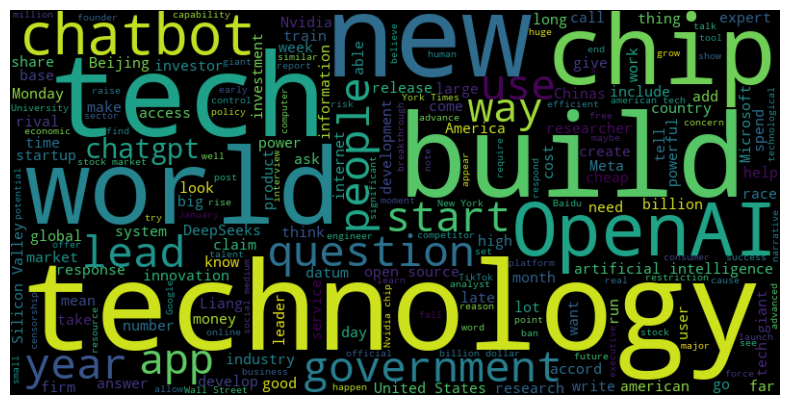

In [215]:
# Step 1: Read the file containing the lemmas
file_path = "../data/deepseek_output_lemmas.txt"  # Replace with the actual path to your file

with open(file_path, "r", encoding="utf-8") as file:
    lemmas = file.readlines()  # Read the file and store each line as an element in the list

# Step 2: Clean the lemmas if needed
# Remove any leading/trailing whitespaces or newline characters
lemmas = [lemma.strip() for lemma in lemmas]

# Step 3: Join lemmas into a single string for word cloud visualization
words = " ".join(lemmas)

# Step 4: Generate the word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create the word cloud from the string
wordcloud = WordCloud(width=800, height=400).generate(words)

# Step 5: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")  # This line was incomplete before
plt.axis("off")  # Remove axis for better visualization
plt.show()
